(50000, 28, 28) (50000,)


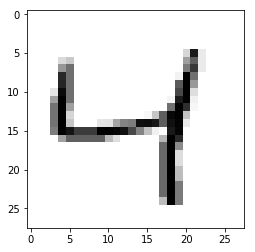

In [32]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[2], cmap="Greys");

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

s = tf.InteractiveSession()
n_x = X_train.shape[1] * X_train.shape[2]
X_train_flatten = X_train.reshape(X_train.shape[0], n_x)
print(X_train_flatten.shape)

X_test_flatten = X_test.reshape(X_test.shape[0], n_x)

X_val_flatten = X_val.reshape(X_val.shape[0], n_x)
#y_train.reshape(1,50000)
one_hot_train = tf.one_hot(indices = y_train, depth = 10, axis = 1)
print(y_train)
one_hot_val = tf.one_hot(indices = y_val, depth = 10, axis = 1)
one_hot_train = s.run(one_hot_train)
one_hot_val = s.run(one_hot_val)#use one_hot deal with y_train and y_val
print(one_hot_train.shape)
print(one_hot_train[0])

(50000, 784)
[5 0 4 ..., 8 4 8]
(50000, 10)
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [3]:

w1 = tf.Variable(tf.random_normal(shape = [n_x,50],mean = 0, stddev = 0.01),dtype = 'float32')
b1 = tf.Variable(tf.random_normal(shape = [50],mean = 0, stddev = 0.01),dtype = 'float32')
w2 = tf.Variable(tf.random_normal(shape = [50, 10],mean = 0, stddev = 0.01),dtype = 'float32')
b2 = tf.Variable(tf.random_normal(shape = [10],mean = 0, stddev = 0.01),dtype = 'float32')

In [4]:
input_X = tf.placeholder("float32", shape=(None,None), name='input_x')
input_y = tf.placeholder("float32", shape=(None,None), name ='input_y')
hidden_y = tf.nn.relu((tf.matmul(input_X, w1) + b1))#input and hidden layer
predicted_y = tf.nn.softmax(tf.matmul(hidden_y,w2)+b2)#output layer

In [5]:
#predicted_y = tf.sigmoid(tf.matmul((tf.matmul(input_X, w1) + b1),w2) + b2) #不能用x_flatten代替input_X
print(predicted_y.shape)

(?, 10)


In [94]:
loss = -tf.reduce_mean(input_y * tf.log(predicted_y + 1e-10) + (1-input_y)* tf.log(1-predicted_y + 1e-10))#将损失函数改成此种形式就不会出现nan
#loss = -tf.reduce_mean(input_y * tf.log(predicted_y) + (1-input_y)*tf.log(1-predicted_y))
print(loss.shape)
#optimizer = tf.train.MomentumOptimizer(0.29,0.9).minimize(loss)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01,beta1=0.9,beta2=0.999,epsilon=1e-08,).minimize(loss)#use Adam

()


In [95]:
s.run(tf.global_variables_initializer())
s.run(optimizer, {input_X:X_train_flatten, input_y:one_hot_train})

In [96]:
for i in range(260):
    s.run(optimizer, {input_X:X_train_flatten, input_y:one_hot_train})
    
    if i % 10 == 0:
        loss_i = s.run(loss,{input_X:X_train_flatten, input_y:one_hot_train})
        print("loss at iter %i:%.10f" % (i, loss_i))

loss at iter 0:0.3028942645
loss at iter 10:0.0862055495
loss at iter 20:0.0601098835
loss at iter 30:0.0490659438
loss at iter 40:0.0411876030
loss at iter 50:0.0355375819
loss at iter 60:0.0315066651
loss at iter 70:0.0283373538
loss at iter 80:0.0256233141
loss at iter 90:0.0232883133
loss at iter 100:0.0213501863
loss at iter 110:0.0194856711
loss at iter 120:0.0178665500
loss at iter 130:0.0164213646
loss at iter 140:0.0151314354
loss at iter 150:0.0139517747
loss at iter 160:0.0128833009
loss at iter 170:0.0118907942
loss at iter 180:0.0110575883
loss at iter 190:0.0102737751
loss at iter 200:0.0094435867
loss at iter 210:0.0087472172
loss at iter 220:0.0080603333
loss at iter 230:0.0073916456
loss at iter 240:0.0068308669
loss at iter 250:0.0062221386


In [97]:
predicted_train = s.run(predicted_y,{input_X:X_train_flatten,input_y:one_hot_train})
print(predicted_train[1])#View the predicted value

[  9.99998927e-01   1.90074363e-15   1.11407257e-06   5.66909684e-08
   4.44781840e-18   1.15786786e-12   2.16096530e-10   7.61815194e-11
   8.27891792e-13   5.96911276e-09]


In [98]:
predicted_val = s.run(predicted_y,{input_X:X_val_flatten,input_y:one_hot_val})
correct_prediction = tf.equal(tf.argmax(predicted_val, 1), tf.argmax(one_hot_val, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
accuracy_result = s.run(accuracy, feed_dict={input_X: X_val_flatten})
print(accuracy_result) #Accuracy rate

0.967
